# Semantic Analysis of Youtube comments

##### This notebook contains the sentiment analysis of the newest videos from suitable youtubers

In [1]:
# importing packages and nltk data libraries
import string
import json
import codecs
import re

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

import pandas as pd
import matplotlib.pyplot as plt



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Load the Reddit Processing class
%load_ext autoreload
%autoreload 1

# we are importing RedditProcessing2.py and its contents
%aimport RedditProcessing2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Vader based sentiment analysis.

In [3]:
def vaderPrintTokens(lTokens, dSentimentScores):
    """
    Print out the tokens and sentiment score.

    @param lTokens: List of tokens to print and colour.
    @dSentimentScores: Dictionary of sentiment from Vader.

    """
    print(*lTokens, sep=', ')
    for cat,score in dSentimentScores.items():
        print('{0}: {1}, '.format(cat, score), end='')
    print()

In [4]:
def vaderSentimentAnalysis(filename, bPrint, tweetProcessor):
    """
    Use Vader lexicons instead of a raw positive and negative word count.

    @param filename: name of input file containing a json formated tweet dump
    @param bPrint: whether to print the stream of tokens and sentiment.  Uses colorama to highlight sentiment words.
    @param tweetProcessor: TweetProcessing object, used to pre-process each tweet.

    @returns: list of tweets, in the format of [date, sentiment]
    """

    # this is the vader sentiment analyser, part of nltk
    sentAnalyser = SentimentIntensityAnalyzer()



    lSentiment = []
    # open file and process tweets, one by one
    channel_comments = pd.read_csv(filename)

    for index, comment in channel_comments.iterrows():
        text = comment['Comment']
        date = comment['Comment Date']
        lTokens = redditProcessor.process(text)

        # this computes the sentiment scores (called polarity score in nltk, but mean same thing essentially)
        # see workshop sheet for what dSentimentScores holds
        dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))

        # save the date and sentiment of each post (used for time series)
        lSentiment.append([date, dSentimentScores['compound']])
        # if we are printing, we print the tokens then the sentiment scores.  Because we don't have the list
        # of positive and negative words, we cannot use colorama to label each token
        if bPrint:
          vaderPrintTokens(lTokens, dSentimentScores)

    return lSentiment

### Semantic analysis of the latest videos




####Sam Tabor Gaming

In [57]:
comment_file = 'Sam Tabor Gaming_comments.csv'
# flag to determine whether to print out tweets and their sentiment
flagPrint = False

In [58]:
# construct the reddit pro-processing object
# use tweet tokenizer
tweetTokenizer = TweetTokenizer()
lPunct = list(string.punctuation)
# standard 'English' stopwords plus we want to remove things like 'rt' (retweet) etc
lStopwords = stopwords.words('english') + lPunct + ['rt', 'via', '...', '…', '"', "'", '`']

#
word_net_lemmatizer = WordNetLemmatizer()

# call the RedditProcessing python script
redditProcessor = RedditProcessing2.RedditProcessing2(tweetTokenizer, lStopwords, word_net_lemmatizer)


In [59]:
# compute the sentiment
lSentiment = []
lSentiment = vaderSentimentAnalysis(comment_file, flagPrint, redditProcessor)

<ipython-input-60-45dd629c371c>:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  newSeries = series.resample('1H').sum()


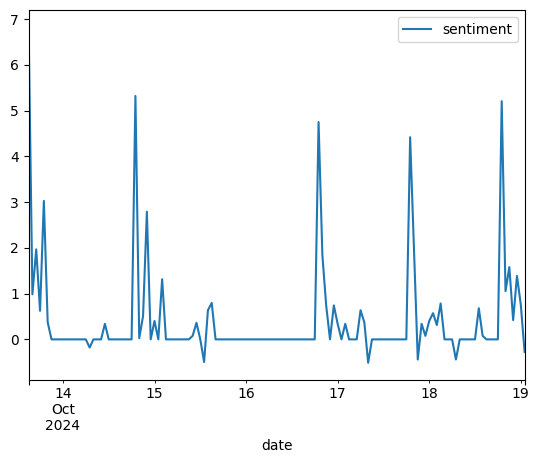

In [60]:

# Plot the sentiment over time

# Load date and sentiment to a dataframe
series = pd.DataFrame(lSentiment, columns=['date', 'sentiment'])
series['date'] = pd.to_datetime(series['date'])

# Index using date, set x axis
series.set_index('date', inplace=True)

# Set sentiments to floats
series[['sentiment']] = series[['sentiment']].apply(pd.to_numeric)

newSeries = series.resample('1H').sum()
# this plots and shows the time series
newSeries.plot()
plt.show()

#### Blox4Fun

In [61]:
comment_file = 'Blox4Fun_comments.csv'
# flag to determine whether to print out tweets and their sentiment
flagPrint = False

In [62]:
# compute the sentiment
lSentiment = []
lSentiment = vaderSentimentAnalysis(comment_file, flagPrint, redditProcessor)

<ipython-input-63-45dd629c371c>:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  newSeries = series.resample('1H').sum()


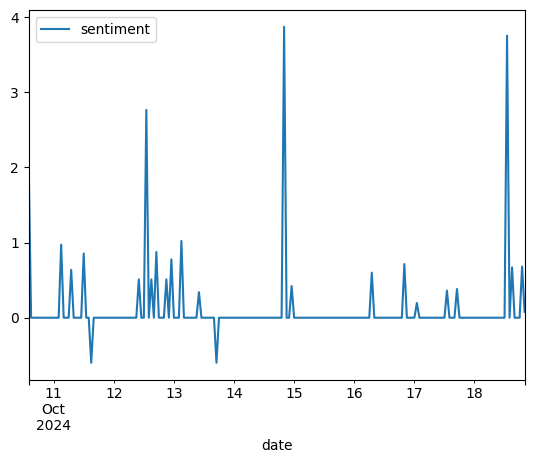

In [63]:

# Plot the sentiment over time

# Load date and sentiment to a dataframe
series = pd.DataFrame(lSentiment, columns=['date', 'sentiment'])
series['date'] = pd.to_datetime(series['date'])

# Index using date, set x axis
series.set_index('date', inplace=True)

# Set sentiments to floats
series[['sentiment']] = series[['sentiment']].apply(pd.to_numeric)

newSeries = series.resample('1H').sum()
# this plots and shows the time series
newSeries.plot()
plt.show()

#### SakawGaming

In [64]:
comment_file = 'SakawGaming_comments.csv'
# flag to determine whether to print out tweets and their sentiment
flagPrint = False

In [65]:
# compute the sentiment
lSentiment = []
lSentiment = vaderSentimentAnalysis(comment_file, flagPrint, redditProcessor)

<ipython-input-66-bd1deced9225>:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  newSeries = series.resample('1H').sum()


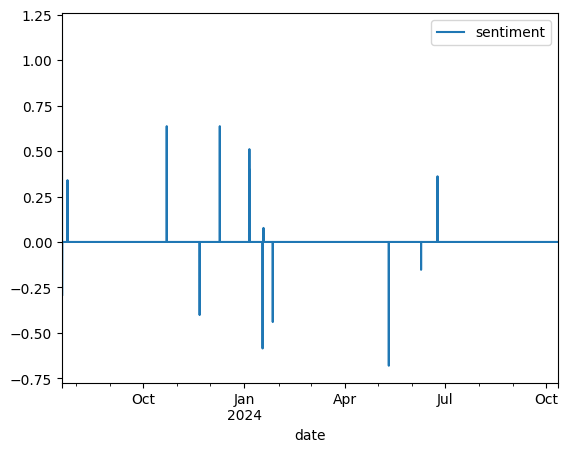

In [66]:

# Plot the sentiment over time

# Load date and sentiment to a dataframe
series = pd.DataFrame(lSentiment, columns=['date', 'sentiment'])
series['date'] = pd.to_datetime(series['date'])

# Index using date, set x axis
series.set_index('date', inplace=True)

# Set sentiments to floats
series[['sentiment']] = series[['sentiment']].apply(pd.to_numeric)


newSeries = series.resample('1H').sum()
# this plots and shows the time series
newSeries.plot()
plt.show()

#### Mobile Arcade

In [67]:
comment_file = 'Mobile Arcade_comments.csv'
# flag to determine whether to print out tweets and their sentiment
flagPrint = False

In [68]:
# compute the sentiment
lSentiment = []
lSentiment = vaderSentimentAnalysis(comment_file, flagPrint, redditProcessor)

<ipython-input-69-bd1deced9225>:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  newSeries = series.resample('1H').sum()


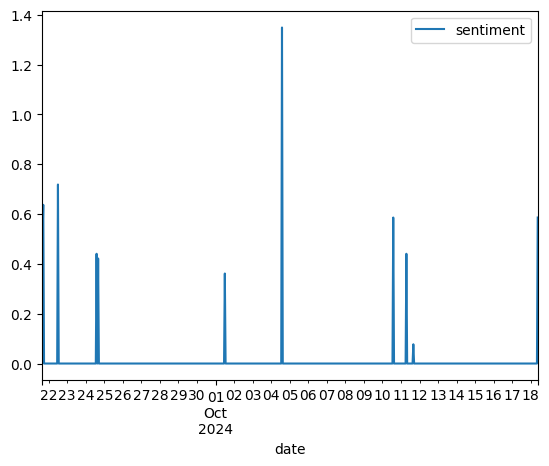

In [69]:

# Plot the sentiment over time

# Load date and sentiment to a dataframe
series = pd.DataFrame(lSentiment, columns=['date', 'sentiment'])
series['date'] = pd.to_datetime(series['date'])

# Index using date, set x axis
series.set_index('date', inplace=True)

# Set sentiments to floats
series[['sentiment']] = series[['sentiment']].apply(pd.to_numeric)


newSeries = series.resample('1H').sum()
# this plots and shows the time series
newSeries.plot()
plt.show()

#### Johan Grönvall - Zapray Games

In [70]:
comment_file = 'Johan Grönvall - Zapray Games_comments.csv'
# flag to determine whether to print out tweets and their sentiment
flagPrint = False

In [71]:
# compute the sentiment
lSentiment = []
lSentiment = vaderSentimentAnalysis(comment_file, flagPrint, redditProcessor)

<ipython-input-72-45dd629c371c>:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  newSeries = series.resample('1H').sum()


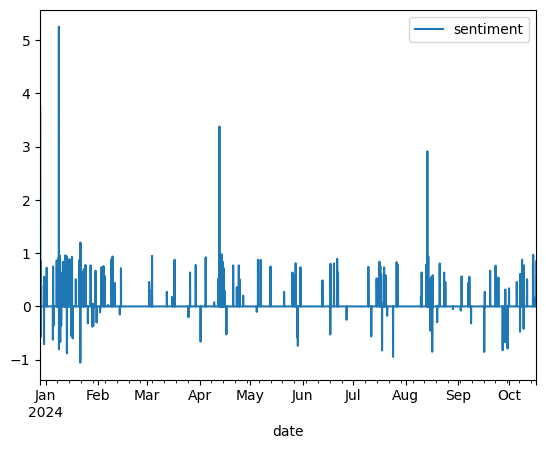

In [72]:

# Plot the sentiment over time

# Load date and sentiment to a dataframe
series = pd.DataFrame(lSentiment, columns=['date', 'sentiment'])
series['date'] = pd.to_datetime(series['date'])

# Index using date, set x axis
series.set_index('date', inplace=True)

# Set sentiments to floats
series[['sentiment']] = series[['sentiment']].apply(pd.to_numeric)

newSeries = series.resample('1H').sum()
# this plots and shows the time series
newSeries.plot()
plt.show()

#### ChilledChaosGane

In [73]:
comment_file = 'ChilledChaosGAME_comments.csv'
# flag to determine whether to print out tweets and their sentiment
flagPrint = False

In [74]:
# compute the sentiment
lSentiment = []
lSentiment = vaderSentimentAnalysis(comment_file, flagPrint, redditProcessor)

<ipython-input-75-45dd629c371c>:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  newSeries = series.resample('1H').sum()


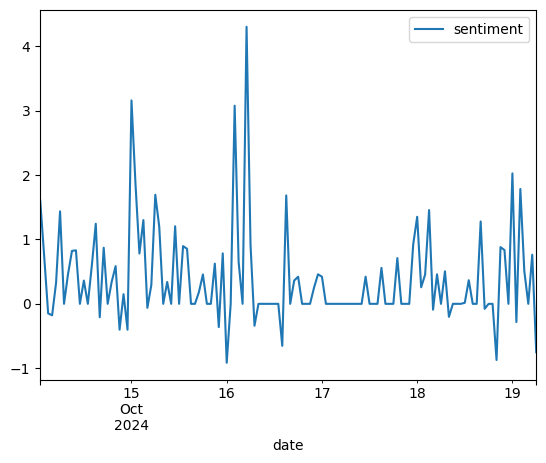

In [75]:

# Plot the sentiment over time

# Load date and sentiment to a dataframe
series = pd.DataFrame(lSentiment, columns=['date', 'sentiment'])
series['date'] = pd.to_datetime(series['date'])

# Index using date, set x axis
series.set_index('date', inplace=True)

# Set sentiments to floats
series[['sentiment']] = series[['sentiment']].apply(pd.to_numeric)

newSeries = series.resample('1H').sum()
# this plots and shows the time series
newSeries.plot()
plt.show()